In [1]:
import sys
import torch
from datetime import date
import numpy
import matplotlib.pyplot  as plt
import seaborn as sns
import umap

sys.path.append('../')

from sage_unsup_syn import SAGE_Unsup

feature_groups = {
    1:['feat_pred_ben_def','feat_pred_mal_def'],
    2:['feat_domain','feat_ip', 'feat_asn','feat_city','feat_subnet'],
    3:['feat_query_count','feat_ip_count','feat_ns_count','feat_isns_domain','feat_soadomain_count','feat_issoa_domain','feat_duration']
    }

feature_labels = [
        'feat_pred_ben_def','feat_pred_mal_def',
#         'feat_domain','feat_ip', 'feat_asn','feat_city','feat_subnet',
#         'feat_query_count','feat_ip_count','feat_ns_count','feat_isns_domain','feat_soadomain_count','feat_issoa_domain','feat_duration',
]

syn_labels = ['x0','x1']

coeffs = { 'model_type': 'sage',
          'epoch':100,
          'num_layers':2,
          'dim':48,
          'outer_batch_size':5000,
          'inner_batch_size':40,
          'train_percentage':0.8,
          'seed':0,
          'experiment_id':5,
          'gpu_id':-1,
          'extra':'s1',
          'labelfeature_names':['feat_pred_ben_def','feat_pred_mal_def']
}
test_name = 'close_100_std2' 
nodes_file = './syn_data/random_nodes_std2.csv'
edges_file = f'./syn_data/{test_name}.csv'
model_file ='./model/explainer_random101.pkl'   


Using backend: pytorch


In [2]:
exp = SAGE_Unsup(nodes_file, edges_file, syn_labels, **coeffs)
for epoch in range(1, 100):
    loss = exp.train()
    val_acc, test_acc = exp.test()
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, '
            f'Val: {val_acc:.4f}, Test: {test_acc:.4f}')

Train tensor(80) Test tensor(20)
Data(x=[100, 2], edge_index=[2, 502], y=[100], train_mask=[100], test_mask=[100], validation_mask=[100])
Epoch: 001, Loss: 80.0175, Val: 0.8000, Test: 0.7500
Epoch: 002, Loss: 20.8687, Val: 0.7750, Test: 0.7500
Epoch: 003, Loss: 20.4500, Val: 0.7750, Test: 0.7500
Epoch: 004, Loss: 20.5461, Val: 0.7875, Test: 0.7500
Epoch: 005, Loss: 28.5040, Val: 0.7750, Test: 0.7500
Epoch: 006, Loss: 18.2742, Val: 0.7750, Test: 0.7500
Epoch: 007, Loss: 14.4906, Val: 0.7875, Test: 0.7500
Epoch: 008, Loss: 17.2576, Val: 0.7875, Test: 0.7500
Epoch: 009, Loss: 13.8622, Val: 0.7750, Test: 0.7500
Epoch: 010, Loss: 11.4364, Val: 0.7750, Test: 0.7500
Epoch: 011, Loss: 11.0575, Val: 0.7750, Test: 0.7500
Epoch: 012, Loss: 9.5320, Val: 0.7750, Test: 0.7500
Epoch: 013, Loss: 10.4085, Val: 0.7625, Test: 0.7500
Epoch: 014, Loss: 10.9840, Val: 0.7750, Test: 0.7500
Epoch: 015, Loss: 6.9229, Val: 0.7750, Test: 0.7500
Epoch: 016, Loss: 6.2888, Val: 0.7750, Test: 0.7500
Epoch: 017, Loss:

In [3]:
x, edge_index = exp.data.x, exp.data.edge_index
with torch.no_grad():
    exp.model.eval()
    out = exp.model.full_forward(x, edge_index).cpu()
out.size()



torch.Size([100, 48])

<class 'numpy.ndarray'> 2


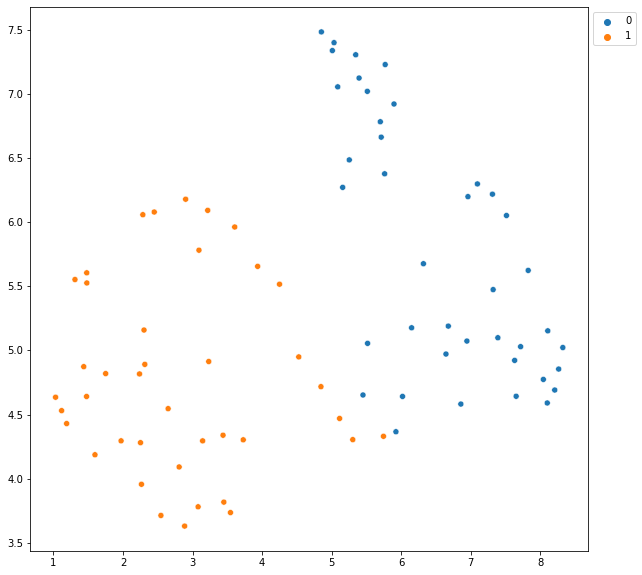

In [37]:
data = exp.data
palette = {}

for n, y in enumerate(set(data.y.numpy())):
    palette[y] = f'C{n}'

embd = umap.UMAP().fit_transform(out.cpu().numpy())

print(type(embd),len(embd[0]))
# numpy.savetxt(f"./embeddings/{test_name}.csv", embd, delimiter=",")
plt.figure(figsize=(10, 10))
sns.scatterplot(x=embd.T[0][data.train_mask], y=embd.T[1][data.train_mask], hue=data.y[data.train_mask].cpu().numpy(), palette=palette)
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.savefig(f"embeddings/{test_name}.png", dpi=120)

torch.Size([100, 2])


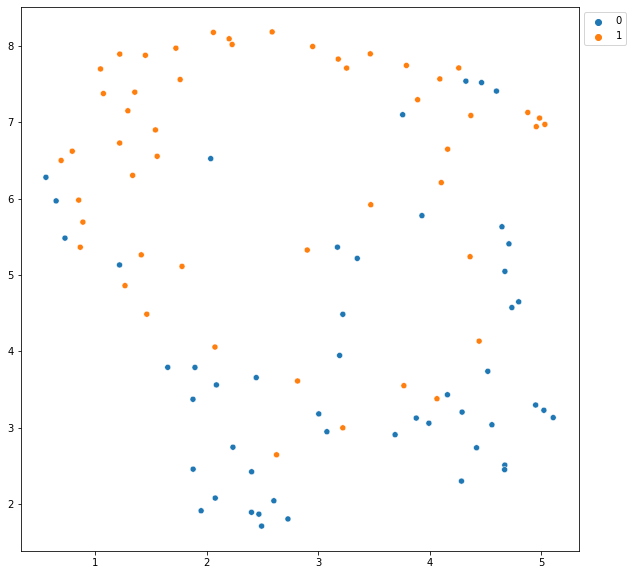

In [16]:
print(data.x.size())

embd_x = umap.UMAP().fit_transform(data.x.numpy())
plt.figure(figsize=(10, 10))
sns.scatterplot(x=embd_x.T[0], y=embd_x.T[1], hue=data.y.cpu().numpy(), palette=palette)
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.savefig(f"./embeddings/{test_name}_data.png", dpi=120)